In [1]:
#MODULE NAME
import os
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.exposure as exposure
import pandas as pd
import numpy as np
import subprocess
import snappy
import imageio
import rasterio as rio
import rasterstats as rs
import rasterio.plot 
from glob import iglob
import geopandas as gpd
from pyspatialml import Raster
import seaborn as sns
from rasterio.plot import show
get_ipython().run_line_magic('matplotlib', 'inline')
from osgeo import gdal
import prosail
from prosail import spectral_lib
import numpy as np
import numpy.matlib
import numpy as np
from numpy.random import seed
from numpy.random import rand
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Installing packages

#Needed for step 1 - data generation

#Installing PROSAIL
#!pip install prosail

#latin hypercube stuff
#lets try to do a LHS
#!pip install lhsmdu

#this package as a number of functions to deal with hyperspectral data
#!pip install pysptools

#General purpose: 
import matplotlib.pyplot as plt
import numpy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

#PROSPECT+SAIL Radiative transfer mode package
import prosail

#Sampling design package
import lhsmdu

#package to for operations on spectral data
import pysptools as sptool 
from pysptools import distance
#machine learning packages are imported later, nearer to the model

# Sentinel 2 data

In [3]:
with rasterio.open(r'C:\Users\BSibiya\Desktop\Sandberg Fynbos Reserve\image\sandberg.tif') as src:
    blue = src.read(1, masked=True) #B2
    green = src.read(2, masked=True) #B3
    red = src.read(3, masked=True) #B4
    Red_Edge_1 = src.read(4, masked=True) #B5
    Red_Edge_2 = src.read(5, masked=True) #B6
    Red_Edge_3 = src.read(6, masked=True) #B7
    nir = src.read(7, masked=True) #B8
    swir_1 = src.read(8, masked=True) #B11
    swir_2 = src.read(9, masked=True) #B12
    
np.seterr(divide='ignore', invalid='ignore')
VI_output = '/Users/BSibiya/Desktop/Sandberg Fynbos Reserve/outputFile/'

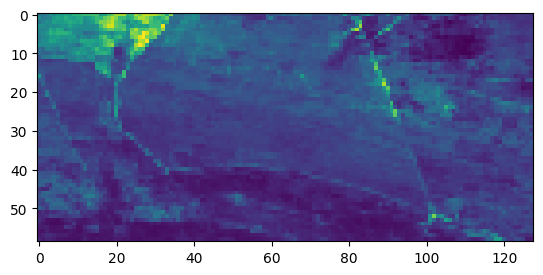

<Axes: >

# Function to calculate vegetation indices

In [20]:
#Function to calculate vegetation indices from band combinations
#Raster_output_name - name of the vegetation index which will be saved 
#VI_name - name of the vegetation index
#cmap_output_name - name of the png file where the file will be stored with colormap applied
#plot_title - title of the image produced 

def create_vegetation_indices(raster_output_name, VI_name, cmap_output_name, plot_title):
    np.seterr(divide='ignore', invalid='ignore')
    kwargs = src.meta
    kwargs.update(
        dtype=rasterio.float32,
        count = 1)
    
    with rasterio.open(VI_output + raster_output_name, 'w', **kwargs) as dst:
        dst.write_band(1, VI_name.astype(rasterio.float32))
    
    plt.imsave(VI_output + cmap_output_name, VI_name, cmap=plt.cm.RdYlGn)
    plt.imshow(VI_name, cmap=cm.RdYlGn)
    plt.colorbar()
    plt.title(plot_title)
    plt.show()
    
#Normalizes numpy arrays into scale -1.0 - 1.0
#array - indicates in this case the array of the image to normalize
def normalize(array):
    array_min, array_max = array.min(-1), array.max(1)
    return ((array - array_min)/(array_max - array_min))

# Normalized Difference vegetation Index - NDVI

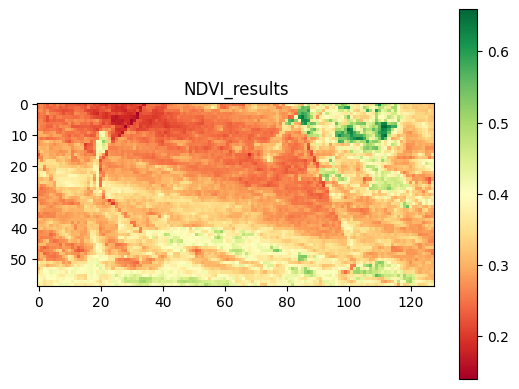

In [21]:
#Equation to calculate NDVI
ndvi = (nir.astype(float) - red.astype(float)) / (nir + red)
#create NDVI bands with the use of create_vegetation_indices function from section 3 - user defined functions 
#The result will be written into tiff and png file with the colormap applied
#ndvi_results = create_vegetation_indices('1_NDVI.tif', ndvi, '1_NDVI_cmap.png', 'NDVI_results')

# Red-Edge - NDVI

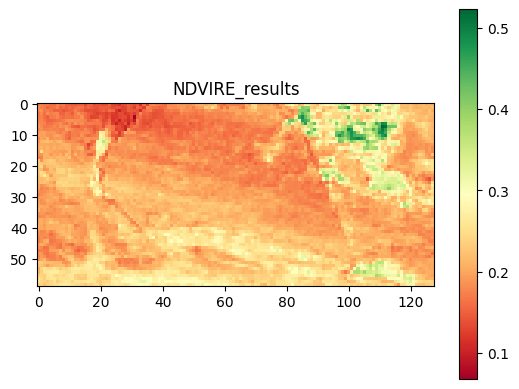

In [22]:
#Equation to calculate NDVI
ndviRE = (nir.astype(float) - Red_Edge_1.astype(float)) / (nir + Red_Edge_1)
#create NDVI bands with the use of create_vegetation_indices function from section 3 - user defined functions 
#The result will be written into tiff and png file with the colormap applied
#ndviRE_results = create_vegetation_indices('2_NDVIRE.tif', ndviRE, '2_NDVIRE_cmap.png', 'NDVIRE_results')

# RTM Example

In [47]:
#n = 1.2 #number of observation 
#car = 10 # carotenoid content of the canopy (in SPAD)
#cbrown = 0.01 #Brown pigment content of the canopy (in g/cm^2)
#cw = 0.015 # Equivalent water thickness of the canopy (in cm)
#cm = 0.009 # Dry matter content of the canopy (in g/cm^2)
#lidfa = 45 # leaf angle distribution parameter (in degrees)
#hspot = 0.01 # Hotspot parameter (in cm)
#tts = 30 # solar zenith angle (in degrees)
#tto = 10 # sensor zenith angle (in degrees)
#psi = 0 # Azimuth angle - difference between sun and sensor (in degrees)
#ant = 0 #Antenna effect (in percent)
#alpha = 40.0 # weighting factor for the PRI (photochemical reflectance index)
#prospect_version = '5' #prospect version
#typelidf = 2 # leaf type index 
#lidfb = 0.0 #leaf angle distribution parameter for background (in degrees)
#factor = 'DHR' # soil factor 
#rsoil0 = None # initial value for the soil reflectance
#rsoil = 1 # soil reflectance 
#psoil = 1 #soil reflectance at the red edge position 
#soil_spectrum1 = None # first soil spectrum
#soil_spectrum2 = None #second soil spectrum 

In [48]:
#lai_range = [x/10 for x in np.arange(0, 10, 0.5)] #range of LAI values (from 0.5 to 5.0 with increaments of 0.1)
#cab_range = np.arange(10, 100, 5) #range of cab values (from 10 to 100 with increaments of 5)
#rho_canopy_list = [] #list to store the spectral rho_canopy values

#for lai in lai_range:
    #for cab in cab_range:
        #rho_canopy = prosail.run_prosail(n, cab, car, cbrown, cw, cm, lai, lidfa, hspot, tts, tto, psi, \
                    #ant=ant, alpha=alpha, prospect_version=prospect_version, typelidf=typelidf, lidfb=lidfb, \
                    #factor=factor, rsoil0=rsoil0, rsoil=rsoil, psoil=psoil, \
                    #soil_spectrum1=soil_spectrum1, soil_spectrum2=soil_spectrum2)
    #rho_canopy_list.append(rho_canopy)  

## First we create datasets of 1000 samples: 


### Varying parameters: Cab and LAI

In [4]:
#number of samples
train_n1000 = 1000


n_traits=2 #I will test on 2 varying traits: cab,lai

#generating a LHS hypercube (it uses a 0 to 1 interval that can be used as a multiplier against the different traits)
np.random.seed(0)
LHS_train1000 = lhsmdu.createRandomStandardUniformMatrix(n_traits,train_n1000 ) #the package has a more advanced method but it is too slow to process

#max_n=1 #this value should go from 1 to 2, so i make it change from 0 to 1 here and then add 1 later
max_cab=79. #add 1
#max_car=44. #add 1
#max_cbrown= 9.99 #add 0.01
#max_cw=0.008 #add 0.001 
#max_cm=0.008 #0.001
max_lai = 9.9 #add 0.1

In [47]:
LHS_train1000

array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.93841202, 0.22864655,
        0.67714114],
       [0.59288027, 0.0100637 , 0.4758262 , ..., 0.48010781, 0.64386404,
        0.50177313]])

# First a function for better control of the prosail call

In [9]:
#in here I create a custom call for prosail, this allows me to more easily control the default values
def custom_prosail(cab, lai):
    import prosail
    #default parameters
    n = 1.2 #number of observation 
    car = 10 # carotenoid content of the canopy (in SPAD)
    cbrown = 0.01 #Brown pigment content of the canopy (in g/cm^2)
    cw = 0.015 # Equivalent water thickness of the canopy (in cm)
    cm = 0.009 # Dry matter content of the canopy (in g/cm^2)
    lidfa = 45 # leaf angle distribution parameter (in degrees)
    hspot = 0.01 # Hotspot parameter (in cm)
    tts = 30 # solar zenith angle (in degrees)
    tto = 10 # sensor zenith angle (in degrees)
    psi = 0 # Azimuth angle - difference between sun and sensor (in degrees)
    ant = 0 #Antenna effect (in percent)
    alpha = 40.0 # weighting factor for the PRI (photochemical reflectance index)
    prospect_version = '5' #prospect version
    typelidf = 2 # leaf type index 
    lidfb = 0.0 #leaf angle distribution parameter for background (in degrees)
    factor = 'DHR' # soil factor 
    rsoil0 = None # initial value for the soil reflectance
    rsoil = 1 # soil reflectance 
    psoil = 1 #soil reflectance at the red edge position 
    soil_spectrum1 = None # first soil spectrum
    soil_spectrum2 = None #second soil spectrum 
  

    #rho_canopy_list = [] #list to store the spectral rho_canopy values
    #lai_range = [x/10 for x in np.arange(0, 10, 0.5)] #range of LAI values (from 0 to 10 with increaments of 0.5)
    #cab_range = np.arange(10, 50, 5) #range of cab values (from 10 to 50 with increaments of 5)
    
    #for lai in lai_range:
        #for cab in cab_range:
    rho_canopy = prosail.run_prosail(n, cab, car, cbrown, cw, cm, lai, lidfa, hspot, tts, tto, psi, \
                                    ant=ant, alpha=alpha, prospect_version=prospect_version, typelidf=typelidf, lidfb=lidfb, \
                                    factor=factor, rsoil0=rsoil0, rsoil=rsoil, psoil=psoil, \
                                    soil_spectrum1=soil_spectrum1, soil_spectrum2=soil_spectrum2)
        #rho_canopy_list.append(rho_canopy)
    return rho_canopy 



In [13]:
#lai_range = [x/10 for x in np.arange(0, 10, 0.5)] #range of LAI values (from 0 to 10 with increaments of 0.5)
#cab_range = np.arange(10, 50, 5) #range of cab values (from 10 to 50 with increaments of 5)
#custom_prosail(cab_range, lai_range)

array([0.0890377 , 0.08890901, 0.08877767, ..., 0.15769076, 0.1575107 ,
       0.15740724])

### Then a function to convert the input hyperspectral data to Sentinel 2A data using a weighted mean approach

In [10]:
def Prosail2S2(path2csv, spectra_input):
    #importing pandas
    import pandas as pd
    import numpy
    import numpy as np
    
    s2_table = pd.read_csv(path2csv,sep=";",decimal=",") #check if this is proper, regarding the sep and dec
    s2_table_sel = s2_table[s2_table['SR_WL'].between(400,2500)] #selects all values between 400 and 2500
    spectra_input_df = pd.DataFrame(data=spectra_input,columns=["rho"],index=s2_table_sel.index) #transforms the input array into a pandas df with the column name rho and row.index = to the original input table

  
    rho_s2 = s2_table_sel.multiply(spectra_input_df['rho'],axis="index") #calculates the numerator
    w_band_sum = s2_table_sel.sum(axis=0,skipna = True) #calculates the denominator

    output = (rho_s2.sum(axis=0)/w_band_sum).rename_axis("ID").values #runs the weighted mean and converts the output to a numpy array

    return output[1:] #removes the first value because it represents the wavelength column

#please LOAD THTE FILE NOW
filepath="/Users/BSibiya/Desktop/Sandberg Fynbos Reserve/S2_response.csv"


## Now we create a function that generates the data given the n input samples

In [11]:
#function expects as input a PD dataframe with the columns properly named
#notice if you change any defaults on the custom_prosail function then you have to go back and
#change that
#this function also transforms the hyperspectral data to sentinel data

def Gen_spectra_data(traits):
    k = 1
    #pd_train_traits=traits
    #print(range(len(traits)))
    for i in range(len(traits)):
        #n_t = pd_train_traits["n"][i]
        cab_t = traits["cab"][i]
        #car_t = pd_train_traits["car"][i]
        #cbrown_t = pd_train_traits["cbrown"][i]
        #cw_t = traits["cw"][i]
        #cm_t = traits["cm"][i]
        lai_t = traits["lai"][i]
        
        if k == 1:
            tr_rho_s = custom_prosail(cab_t, lai_t)
            tr_rho_s = Prosail2S2(filepath,tr_rho_s)
            #plt.plot ( x, tr_rho_s, ':', label="Training prosail")
            #plt.legend(loc='best')
        if k > 1:
            tr_rho_t = custom_prosail(cab_t, lai_t)
            tr_rho_t = Prosail2S2(filepath, tr_rho_t)
            tr_rho_s = np.vstack((tr_rho_s, tr_rho_t))
            #plt.plot ( x, tr_rho_t, ':')
        
        k +=1
    
    
    rho_samples=tr_rho_s
    return rho_samples

## Now we can get the datasets

In [12]:
#preparing function inputs

pd_traits1000 = pd.DataFrame.transpose(pd.DataFrame(LHS_train1000))

pd_traits1000.columns = ["cab","lai"]

#pd_traits1000["car"]=pd_traits1000["car"]*max_car+1 
pd_traits1000["cab"]=pd_traits1000["cab"]*max_cab+1.
pd_traits1000["lai"]=pd_traits1000["lai"]*max_lai+.25

#pd_train_traits["n"]=pd_t
np_spectra1000 = Gen_spectra_data(pd_traits1000)

print(np_spectra1000.shape)

(1000, 13)


In [13]:
pd_traits1000

,cab,lai
0,44.356267,6.119515
1,57.499960,0.349631
2,48.618307,4.960679
3,44.045771,7.266827
4,34.468729,0.685357
...,...,...
995,8.716433,8.083687
996,41.678854,7.389861
997,75.134550,5.003067
998,19.063078,6.624254


In [14]:
#lets also create a numpy object for the tratis
np_traits1000 = pd_traits1000.iloc[:,:].values

In [15]:
np_traits1000

array([[44.35626681,  6.11951468],
       [57.49995994,  0.34963059],
       [48.61830671,  4.96067934],
       ...,
       [75.13454971,  5.00306729],
       [19.06307753,  6.62425396],
       [54.49415038,  5.21755399]])

## Dataframes to store values of extracted pixel

In [34]:
dataframe = r'C:\Users\BSibiya\Desktop\Sandberg Fynbos Reserve\dataset.xlsx'
df = pd.read_excel(dataframe)
df.head()

,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_11,BAND_12,CHLORO,LAI
0,934,803,760,908,1140,1276,1309,2411,1486,21.22768,2.65346
1,948,812,758,925,1160,1291,1341,2405,1500,22.22008,2.77751
2,921,788,724,905,1170,1305,1337,2351,1433,23.79424,2.97428
3,948,805,759,919,1145,1279,1297,2428,1491,20.47040,2.55880
4,964,826,789,932,1160,1297,1326,2501,1568,20.31208,2.53901


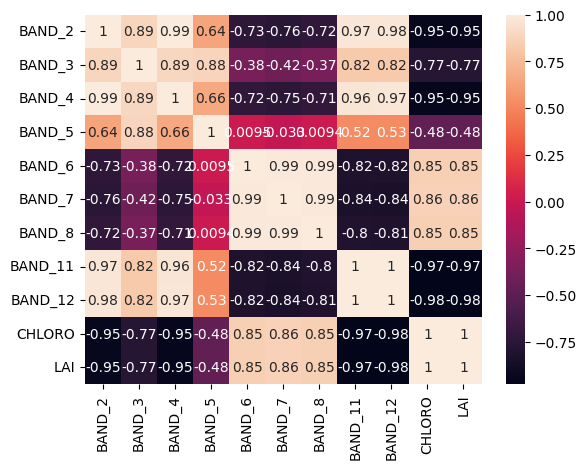

In [37]:
#Visual representation of correlation matrix using seaborn python module
corrMatrix = df.corr() #create first simple correlation matrix
sns.heatmap(corrMatrix, annot=True) #plot the correlation matrix as a heatmap 
plt.show()


<Axes: xlabel='BAND_8', ylabel='CHLORO'>

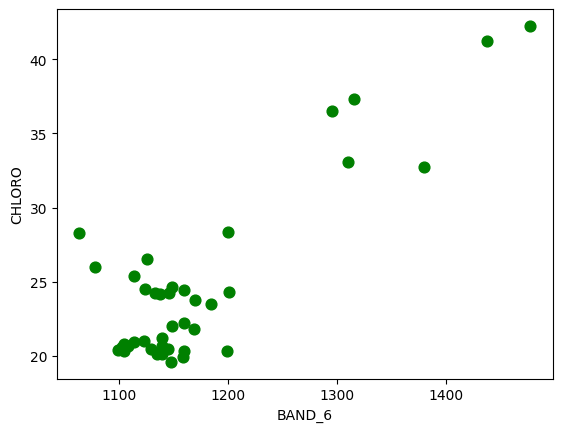

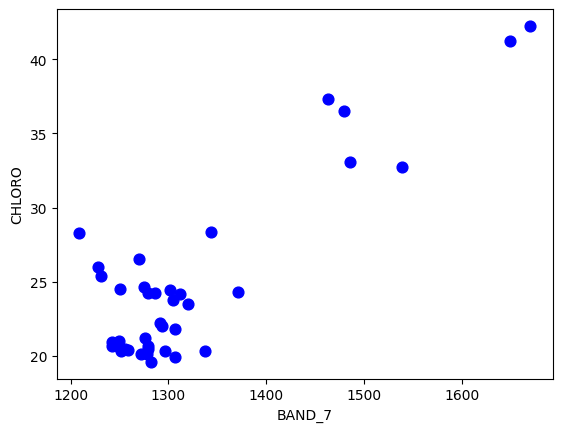

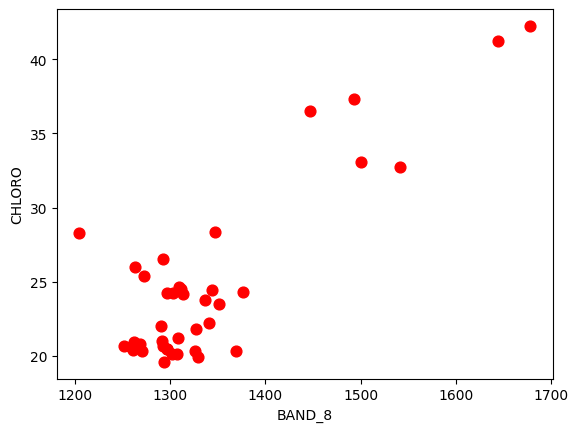

In [38]:
#we will plot each vegetation index against LAI values in order to see the relationship between these values 
df.plot.scatter(x='BAND_6', y='CHLORO', s=60, c='green')
df.plot.scatter(x='BAND_7', y='CHLORO', s=60, c='blue')
df.plot.scatter(x='BAND_8', y='CHLORO', s=60, c='red')

<Axes: xlabel='BAND_12', ylabel='CHLORO'>

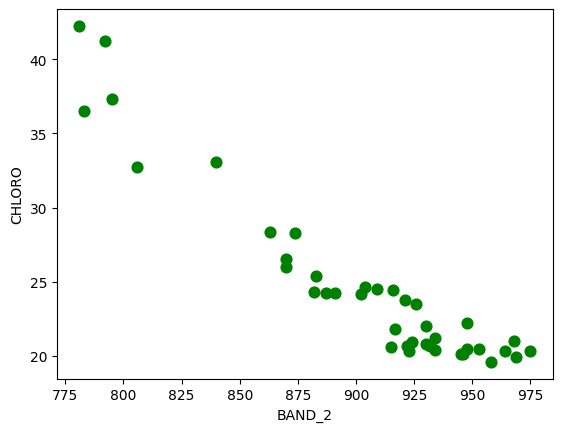

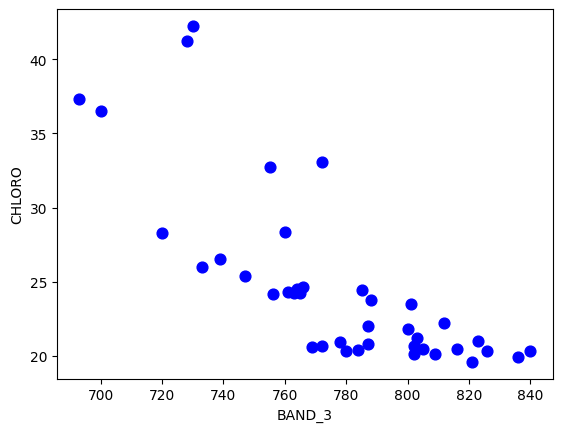

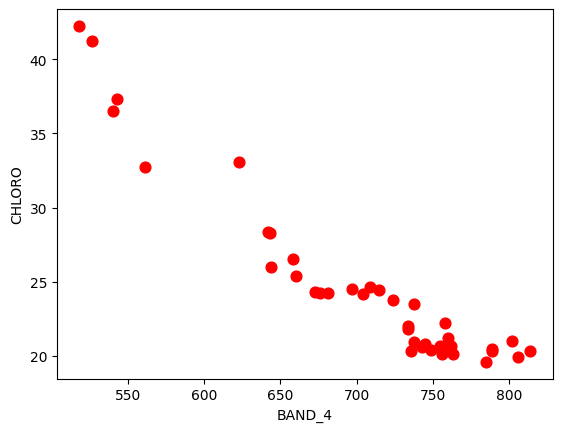

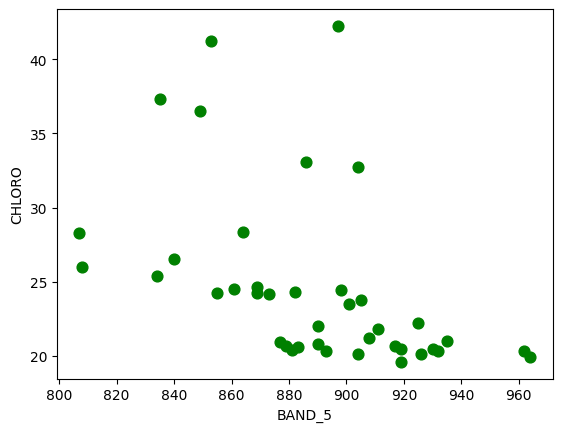

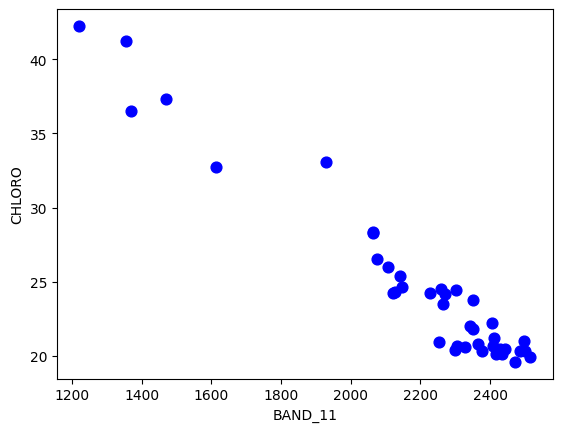

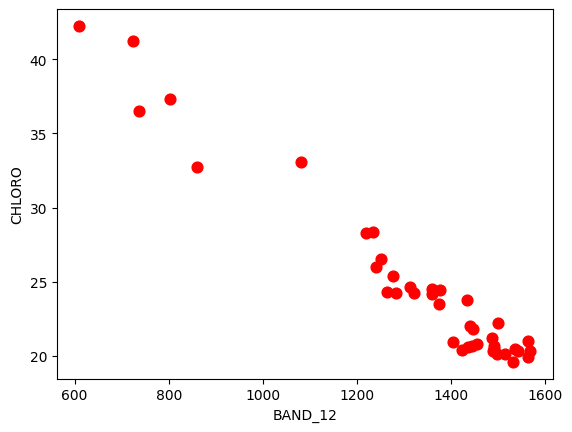

In [39]:
df.plot.scatter(x='BAND_2', y='CHLORO', s=60, c='green')
df.plot.scatter(x='BAND_3', y='CHLORO', s=60, c='blue')
df.plot.scatter(x='BAND_4', y='CHLORO', s=60, c='red')
df.plot.scatter(x='BAND_5', y='CHLORO', s=60, c='green')
df.plot.scatter(x='BAND_11', y='CHLORO', s=60, c='blue')
df.plot.scatter(x='BAND_12', y='CHLORO', s=60, c='red')

In [42]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [66]:
#Choose columns which include all variables (X- Predictors -VIs and y - Dependent variables) which will be used as an input to all regression model
#Use columns nanes from dataframe created previously to select predictor variables for the model
X_data = df.iloc[:, 0:9].values #As predictors we are going to use following values" 'NDVI', 'NDI45', 'SAVI', NDMI
y_data = df.iloc[:, 9:10].values #Dependent variable - LAI is stored in the first column of the dataframe 

# Random Forest Regression

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.30, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1, random_state=0)
RFReg.fit(X_train, y_train)
y_pred_RFReg = RFReg.predict(X_test)
from sklearn import metrics
r_square_rf = metrics.r2_score(y_test, y_pred_RFReg)
print('r-square: ', r_square_rf)


C:\Users\BSibiya\AppData\Local\Temp\ipykernel_13096\919333008.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg.fit(X_train, y_train)


r-square:  0.9278065267142611


In [70]:
#The values of the importance will be calculated based on the model
rf_features = df.iloc[:, 0:9]
features_list = list(rf_features.columns)
importances = list(RFReg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: BAND_12              Importance: 0.19
Variable: BAND_4               Importance: 0.18
Variable: BAND_6               Importance: 0.16
Variable: BAND_3               Importance: 0.13
Variable: BAND_7               Importance: 0.11
Variable: BAND_11              Importance: 0.09
Variable: BAND_8               Importance: 0.07
Variable: BAND_2               Importance: 0.05
Variable: BAND_5               Importance: 0.01


[None, None, None, None, None, None, None, None, None]

In [71]:
inRaster = '/Users/BSibiya/Desktop/Sandberg Fynbos Reserve/image/sandberg.tif' #Define path to the input raster

In [90]:
def createGeotiff(outRaster, data, geo_transform, projection):
    driver = gdal.GetDriverByName('GTiff')
    rows, cols = data.shape
    rasterDS = driver.Create(outRaster, cols, rows, 1, gdal.GDT_Float32)
    rasterDS.SetGeoTransform(geo_transform)
    rasterDS.SetProjection(projection)
    band = rasterDS.GetRasterBand(1)
    band.WriteArray(data)
    rasterDS = None 

In [89]:
df_train = pd.read_excel(dataframe) #path to the dataset with training data
data = df_train[['BAND_2', 'BAND_3', 'BAND_4', 'BAND_5','BAND_6', 'BAND_7', 'BAND_8', 'BAND_11','BAND_12']] #list of predictors 
label = df_train['CHLORO'] #predicted variable(dependent variable LAI)
ds = gdal.Open(inRaster, gdal.GA_ReadOnly) #with gdal module we will open the input raster
rows = ds.RasterYSize #we need to assign the size of the raster - rows number in the raster dataset
cols = ds.RasterXSize #we need to assign the size of the raster - columns number in the raster dataset
bands = ds.RasterCount # we will also get the number of bands in the input raster (in our case 4)
geo_transform = ds.GetGeoTransform() #with geotransform class we will set projection to the raster
projection = ds.GetProjectionRef() #projection of the raster needs to be the same as input raster
array = ds.ReadAsArray() #raster will be converted to an array 
ds = None
array = np.stack(array, axis=2) #with numpy we will join the sequence of the arrays along a new axes
array = np.reshape(array, [rows*cols, bands]) #we give a final shape to the output raster: number of columns and rows and bands must be the same as 
test = pd.DataFrame(array, dtype='float32') #we will create raster with the same datatype 'float32' as input raster
outRaster = '/Users/BSibiya/Desktop/Sandberg Fynbos Reserve/outputFile/CHLORO_RFReg.tif' #path to the output raster - where it will be saved 
#PREDICTION OF ABOVEGROUND BIOMASS VALUES BASED ON THE TRAINING DATASET AND THE RASTER STACK PROVIDED
CHLORO_RFReg = RFReg.predict(test) #run the prediction on multiple linear regression model previously created 
estimation = CHLORO_RFReg.reshape((rows, cols)) #reshape output array into array with same defined previously number of columns and rows


In [91]:
#explot classified image using 'createGeoftiff' function provided in the section number 3
createGeotiff(outRaster, estimation, geo_transform, projection)

In [92]:
#read the output raster and open it 
CHLORO_RF = rasterio.open(r'C:\Users\BSibiya\Desktop\Sandberg Fynbos Reserve\outputFile\CHLORO_RFReg.tif')

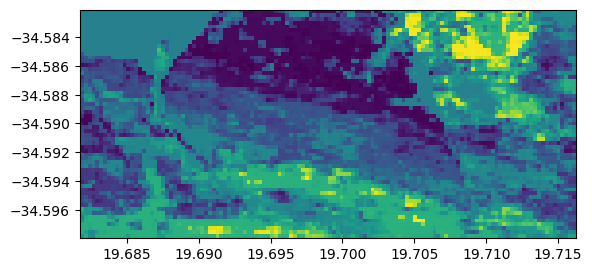

<Axes: >

In [93]:
show(CHLORO_RF)

### Now we need to K-fold the data so we can do the LOOCV - Leave one out cross validation

In [16]:
from sklearn.model_selection import KFold # import KFol

#this command is enough to set u the k-fold
kf = KFold(n_splits=5) # Define the split 

#test spot
#X = np_spectra0500
#Y = np.arange(len(np_spectra0500)) #this is simply a place holder

#The kfold of sklearn doesn't actually randomize the folding but that is ok because
#the samples were generated randomly anyway. 
#k = 1
#for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  #X_train, X_test = X[train_index], X[test_index]
  #y_train, y_test = Y[train_index], Y[test_index]
  #print(k)
  #print(train_index.shape)
  #print(test_index.shape)
  #k=k+1
#uncomment above to see how it works


In [23]:
#machine learning stuff

#NEURAL NETWORK - Keras will be updated soon so this colab will also have to be changed
from sklearn.neural_network import MLPRegressor as ANN_reg #this is a simpler neural network package
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#ignore the warning for now

#Random FOREST
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

#Gaussian processes
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern

#initializing the ANN
ann_ml = Sequential()
#ann_ml.add(Dense(9, input_dim=9, activation='linear'))
ann_ml.add(Dense(10, input_dim=9, activation='tanh'))
ann_ml.add(Dense(6, activation='relu'))
ann_ml.add(Dense(4)) #indeed this ha to be added in this case without any activ function, the R script added this on its own
#model.add(Dense(1, activation='sigmoid'))

# compile the keras model
ann_ml.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

#initializing the random forest
rfr_ml = RandomForestRegressor(n_estimators=1000,random_state=0,
                              min_samples_leaf=5,min_samples_split=5,verbose=1)
#initializing the gaussian process
gpr_ml = GaussianProcessRegressor(n_restarts_optimizer=50,
                                        normalize_y=True,
                                        random_state=0)


### Creating an empty pandas dataframe to store the output of the models

In [24]:
column_names=["Model",
              "NSamples",
              "Variable",
              "Fold_nr",
              "ExplVar",
              "Max_err",
              "Mean_abs_Err",
              "Mean_sqr_err",
              #"Mean_sqr_lg_err",
              "Median_abs_err",
              "r2",
              "MAPE"]
              #"Mean_poiss_dev",
              #"Mean_gamma_dev"]
              #"Mean_tweed_dev"]

#mape is not existant in the package so we have to create it:
#https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
#from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
#creating a df to receive the data
df_metrics = pd.DataFrame(columns=column_names)

#we pick only the bands at 20m resolution - i reckon it is actually peaceful to use everything.. 

#first we subset the bands to the 20m resolution only
#S2A_SR_AV_B1	S2A_SR_AV_B2	S2A_SR_AV_B3	
#S2A_SR_AV_B4	S2A_SR_AV_B5	S2A_SR_AV_B6	
#S2A_SR_AV_B7	S2A_SR_AV_B8	S2A_SR_AV_B8A	
#S2A_SR_AV_B9	S2A_SR_AV_B10	S2A_SR_AV_B11	
#S2A_SR_AV_B12

train_df_1000 = np_traits1000


#importing metric functions
from sklearn import metrics

#the ANN requires that we transform the variables
from sklearn.preprocessing import MinMaxScaler 
scaler_1000 = MinMaxScaler()

# Measuring the accuraccy the of the regression

In [45]:
#with 1000 samples
k=1

for train_index, test_index in kf.split(train_df_1000):
    #subsetting for ith k-fold
    X_train, X_test = train_df_1000[train_index], train_df_1000[test_index]
    Y_train, Y_test = np_traits1000[train_index], np_traits1000[test_index]
    label_names = ["cab", "lai"]

    #ANN - Training 
    scaler_1000.fit(Y_train)
    Y_train_norm = scaler_1000.transform(Y_train)
    #ann_ml.fit(X_train, Y_train_norm, epochs=1500,verbose=0)

    #RF - Training n
    rfr_ml.fit(X_train,Y_train)

    #GPR - Training 
    gpr_ml.fit(X_train,Y_train)

    #Prediction
    #y_ann_1000 = scaler_1000.inverse_transform(ann_ml.predict(X_test))
    y_rfr_1000 = rfr_ml.predict(X_test)
    y_gpr_1000 = gpr_ml.predict(X_test)
    
    
    for i in range(n_traits):
        #creating the temp list
    
        rfr_temp_list = {"Model":"RFr",
                         "NSamples":1000,
                         "Variable":label_names[i],
                         "Fold_nr":k,
                         "ExplVar": metrics.explained_variance_score(Y_test[:,i], y_rfr_1000[:,i]),
                         "Max_err": metrics.max_error(Y_test[:,i], y_rfr_1000[:,i]),
                         "Mean_abs_Err": metrics.mean_absolute_error(Y_test[:,i], y_rfr_1000[:,i]),
                         "Mean_sqr_err": metrics.mean_squared_error(Y_test[:,i], y_rfr_1000[:,i]),
                         #"Mean_sqr_lg_err": metrics.mean_squared_log_error(Y_test[:,i], y_rfr_0500[:,i]),
                         "Median_abs_err" : metrics.median_absolute_error(Y_test[:,i], y_rfr_1000[:,i]),
                         "r2": metrics.r2_score(Y_test[:,i], y_rfr_1000[:,i]),
                         #"Mean_poiss_dev" : metrics.mean_poisson_deviance(Y_test[:,i], y_rfr_0500[:,i]),
                         #"Mean_gamma_dev" : metrics.mean_gamma_deviance(Y_test[:,i], y_rfr_0500[:,i])}
                         #"Mean_tweed_dev" : metrics.mean_tweedie_deviance(Y_test[:,i], y_rfr_0500[:,i])}
                         "MAPE": mean_absolute_percentage_error(Y_test[:,i], y_rfr_1000[:,i])}

        gpr_temp_list = {"Model":"GPR",
                         "NSamples":1000,
                         "Variable":label_names[i],
                         "Fold_nr":k,
                         "ExplVar": metrics.explained_variance_score(Y_test[:,i], y_gpr_1000[:,i]),
                         "Max_err": metrics.max_error(Y_test[:,i], y_gpr_1000[:,i]),
                         "Mean_abs_Err": metrics.mean_absolute_error(Y_test[:,i], y_gpr_1000[:,i]),
                         "Mean_sqr_err": metrics.mean_squared_error(Y_test[:,i], y_gpr_1000[:,i]),
                         #"Mean_sqr_lg_err": metrics.mean_squared_log_error(Y_test[:,i], y_gpr_0500[:,i]),
                         "Median_abs_err" : metrics.median_absolute_error(Y_test[:,i], y_gpr_1000[:,i]),
                         "r2": metrics.r2_score(Y_test[:,i], y_gpr_1000[:,i]),
                         #"Mean_poiss_dev" : metrics.mean_poisson_deviance(Y_test[:,i], y_gpr_0500[:,i]),
                         #"Mean_gamma_dev" : metrics.mean_gamma_deviance(Y_test[:,i], y_gpr_0500[:,i])}
                         #"Mean_tweed_dev" : metrics.mean_tweedie_deviance(Y_test[:,i], y_gpr_0500[:,i])}
                         "MAPE": mean_absolute_percentage_error(Y_test[:,i], y_gpr_1000[:,i])}

        #appending to the dataframe
        #df_metrics = df_metrics.append(ann_temp_list,ignore_index=True)
        df_metrics = df_metrics.append(rfr_temp_list,ignore_index=True)
        df_metrics = df_metrics.append(gpr_temp_list,ignore_index=True)
    k = k+1

df_metrics.to_csv("run1000.csv",sep=";",decimal=",")



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\BSibiya\AppData\Local\Temp\ipykernel_23028\2445091779.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(rfr_temp_list,ignore_index=True)
C:\Users\BSibiya\AppData\Local\Temp\ipykernel_23028\2445091779.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(gpr_temp_list,ignore_index=True)
C:\Users\BSibiya\AppData\Local\Temp\ipykernel_23028\2445091779.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

In [51]:
df_metrics.head(30)

,Model,NSamples,Variable,Fold_nr,ExplVar,Max_err,Mean_abs_Err,Mean_sqr_err,Median_abs_err,r2,MAPE
0,RFr,1000,cab,1,0.999630,1.816552,0.324917,0.186405,0.236238,0.999629,2.922343
1,GPR,1000,cab,1,0.996973,12.160998,0.461546,1.523419,0.104819,0.996972,5.580947
2,RFr,1000,lai,2,0.934161,2.068251,0.594267,0.588612,0.431535,0.934120,40.175131
3,GPR,1000,lai,2,0.992931,2.314856,0.104540,0.063286,0.030613,0.992917,11.885360
4,RFr,1000,cab,3,0.999473,1.554755,0.431899,0.288390,0.377768,0.999465,2.420749
5,GPR,1000,cab,3,0.993370,15.685552,0.660730,3.578472,0.128638,0.993360,6.076580
6,RFr,1000,lai,4,0.939657,2.236483,0.554466,0.538395,0.421824,0.939329,26.498993
7,GPR,1000,lai,4,0.987079,2.319863,0.124077,0.114853,0.030417,0.987057,9.585206
8,RFr,1000,cab,5,0.999522,2.234853,0.399226,0.277497,0.307426,0.999510,3.040182
9,GPR,1000,cab,5,0.997336,11.898664,0.438755,1.510184,0.129756,0.997333,4.637225
